<a href="https://colab.research.google.com/github/Nadaramadan1/Machine-Learning-Applications/blob/main/Nada_Ramadan_Medical_Diagnose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [ ]:
# 📦 Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧠 Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
data = pd.read_csv('/content/synthetic_asthma_dataset.csv')
data.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [ ]:
data.shape

(10000, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [ ]:
data.drop(['Patient_ID'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,2936
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0
Comorbidities,4967


In [ ]:
data.fillna({'Allergies': 'Unknown'}, inplace=True)


In [ ]:
data['Comorbidities'] = data['Comorbidities'].fillna('None')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Prep data
X = data.drop(columns=['Asthma_Control_Level'])
y = data['Asthma_Control_Level'].dropna()
X_model = X.loc[y.index]  # Align non-missing targets

# Encode categorical + train
from sklearn.preprocessing import LabelEncoder
for col in X_model.select_dtypes(include='object').columns:
    X_model[col] = LabelEncoder().fit_transform(X_model[col])

model = RandomForestClassifier()
model.fit(X_model, y)

# Predict for missing rows
missing_idx = data[data['Asthma_Control_Level'].isnull()].index
X_missing = X.loc[missing_idx].copy()
for col in X_missing.select_dtypes(include='object').columns:
    X_missing[col] = LabelEncoder().fit_transform(X_missing[col])

predicted = model.predict(X_missing)
data.loc[missing_idx, 'Asthma_Control_Level'] = predicted


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,0
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0
Comorbidities,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Loop through all object-type columns
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


In [ ]:
print(data.dtypes)


Age                          int64
Gender                       int64
BMI                        float64
Smoking_Status               int64
Family_History               int64
Allergies                    int64
Air_Pollution_Level          int64
Physical_Activity_Level      int64
Occupation_Type              int64
Comorbidities                int64
Medication_Adherence       float64
Number_of_ER_Visits          int64
Peak_Expiratory_Flow       float64
FeNO_Level                 float64
Has_Asthma                   int64
Asthma_Control_Level         int64
dtype: object


# Feature Scaling and Splitting

In [ ]:
def scale_data(X_train, X_test, X_val=None):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val) if X_val is not None else None
    return X_train_scaled, X_test_scaled, X_val_scaled

# Modeling

In [ ]:
# 📊 Define features and target
X = data.drop(columns=['Has_Asthma'])   # Change to 'Asthma_Control_Level' if needed
y = data['Has_Asthma']

# 🧪 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),

}

# 🚀 Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.8910
Decision Tree: Accuracy = 0.9995
Random Forest: Accuracy = 0.9975
Support Vector Machine: Accuracy = 0.9825
K-Nearest Neighbors: Accuracy = 0.8965
XGBoost: Accuracy = 0.9990


In [ ]:
# 🔄 5-fold cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name}: CV Mean Accuracy = {scores.mean():.4f} | Std = {scores.std():.4f}")


Logistic Regression: CV Mean Accuracy = 0.8828 | Std = 0.0078
Decision Tree: CV Mean Accuracy = 0.9998 | Std = 0.0003
Random Forest: CV Mean Accuracy = 0.9979 | Std = 0.0009
Support Vector Machine: CV Mean Accuracy = 0.9760 | Std = 0.0027
K-Nearest Neighbors: CV Mean Accuracy = 0.8846 | Std = 0.0054
XGBoost: CV Mean Accuracy = 0.9998 | Std = 0.0003


# Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_model_basic(model, X_test, y_test):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))

# 🚀 Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Evaluating {name}")
    model.fit(X_train_scaled, y_train)
    evaluate_model_basic(model, X_test_scaled, y_test)



🔍 Evaluating Logistic Regression
Accuracy: 0.8910

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1504
           1       0.81      0.73      0.77       496

    accuracy                           0.89      2000
   macro avg       0.86      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000


Confusion Matrix:
[[1422   82]
 [ 136  360]]

🔍 Evaluating Decision Tree
Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      1.00      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1504    0]
 [   1  495]]

🔍 Evaluating Random Forest
Accuracy: 0.9960

Classification Report:
              precision    recall  f1-sco

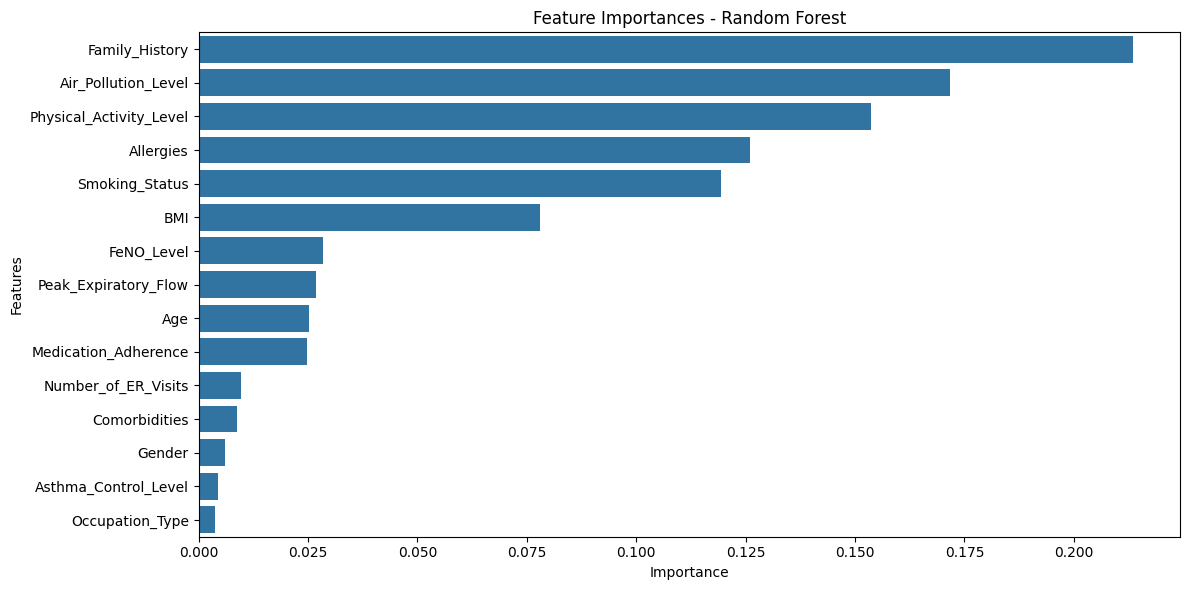

In [ ]:
# 🏆 Visualize feature importance for Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


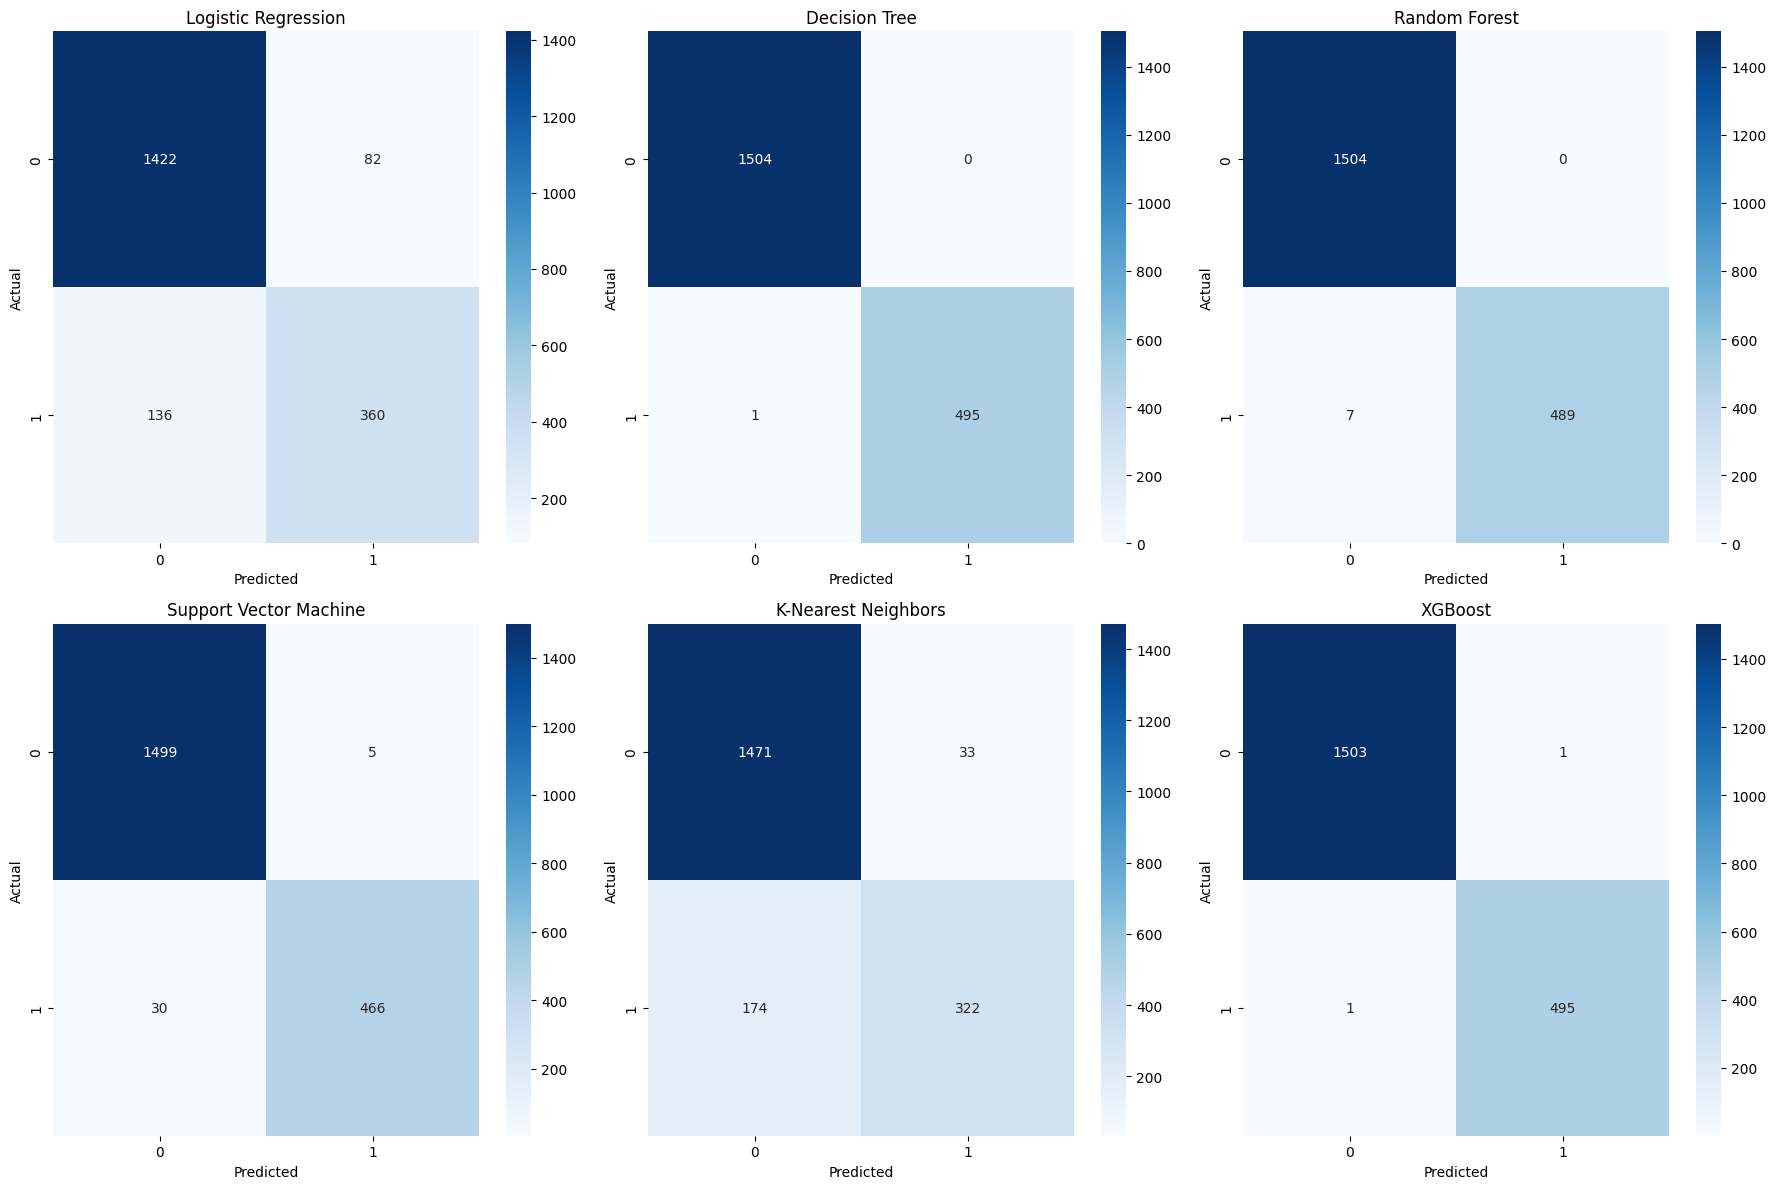

In [ ]:
# 📊 Set up plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# 🚀 Plot confusion matrix for each model
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# 🧠 Handle any leftover subplot space if <6 models
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# SMOTE

In [ ]:
# ⚖️ Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 🧠 Initialize models
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

# 🚀 Train models on balanced data
logistic_model.fit(X_train_bal, y_train_bal)
knn_model.fit(X_train_bal, y_train_bal)

# 🧪 Make predictions
logistic_preds = logistic_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)

# 📊 Evaluate performance
print("\nLogistic Regression Report:")
print(classification_report(y_test, logistic_preds))

print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_preds))
print("Accuracy:", accuracy_score(y_test, logistic_preds))

print("\nK-Nearest Neighbors Report:")
print(classification_report(y_test, knn_preds))

print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1504
           1       0.70      0.89      0.78       496

    accuracy                           0.88      2000
   macro avg       0.83      0.88      0.85      2000
weighted avg       0.90      0.88      0.88      2000

Confusion Matrix:
 [[1317  187]
 [  56  440]]
Accuracy: 0.8785

K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1504
           1       0.67      0.89      0.77       496

    accuracy                           0.87      2000
   macro avg       0.82      0.87      0.84      2000
weighted avg       0.89      0.87      0.87      2000

Confusion Matrix:
 [[1291  213]
 [  56  440]]
Accuracy: 0.8655


# Hyperparameter Tuning

In [ ]:
# ✅ Define parameter grid for Logistic Regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# ✅ Define parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 📦 Create model objects
logistic = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

# 🔁 Create GridSearch objects
logistic_grid = GridSearchCV(logistic, logistic_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# 🚀 Fit on balanced training data
logistic_grid.fit(X_train_bal, y_train_bal)
knn_grid.fit(X_train_bal, y_train_bal)

# 🎯 Get best models
best_logistic = logistic_grid.best_estimator_
best_knn = knn_grid.best_estimator_

# 🧪 Evaluate on test set
from sklearn.metrics import classification_report

print("\n🔎 Logistic Regression Best Params:", logistic_grid.best_params_)
print("\n📊 Logistic Regression Evaluation:\n", classification_report(y_test, best_logistic.predict(X_test_scaled)))

print("\n🔎 KNN Best Params:", knn_grid.best_params_)
print("\n📊 KNN Evaluation:\n", classification_report(y_test, best_knn.predict(X_test_scaled)))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits

🔎 Logistic Regression Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

📊 Logistic Regression Evaluation:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1504
           1       0.68      0.90      0.77       496

    accuracy                           0.87      2000
   macro avg       0.82      0.88      0.84      2000
weighted avg       0.89      0.87      0.87      2000


🔎 KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

📊 KNN Evaluation:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1504
           1       0.77      0.84      0.80       496

    accuracy                           0.90      2000
   macro avg       0.86      0.88      0.87      2000
weighted avg       0.90      0.90      0.90      20

# Cross_Validation

In [ ]:
# 🔀 Create train, test, validation split
X_temp, X_val, y_temp, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# ⚖️ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# 🎯 Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
rf_val_preds = rf.predict(X_val_scaled)
print("\nRandom Forest Validation Report:")
print(classification_report(y_val, rf_val_preds))

# 🎯 Train XGBoost
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=4, subsample=0.8,
                    colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=1, random_state=42)
xgb.fit(X_train_scaled, y_train,
        eval_set=[(X_val_scaled, y_val)], verbose=False)
xgb_val_preds = xgb.predict(X_val_scaled)
print("\nXGBoost Validation Report:")
print(classification_report(y_val, xgb_val_preds))


Random Forest Validation Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       752
           1       1.00      0.97      0.99       248

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000


XGBoost Validation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       752
           1       1.00      1.00      1.00       248

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

